In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/haarcascade_frontalface_default.xml  
   creating: dataset/without mask/
  inflating: dataset/without mask/413.jpg  
  inflating: dataset/without mask/augmented_image_111.jpg  
  inflating: dataset/without mask/337.jpg  
  inflating: dataset/without mask/435.jpg  
  inflating: dataset/without mask/augmented_image_262.jpg  
  inflating: dataset/without mask/augmented_image_65.jpg  
  inflating: dataset/without mask/augmented_image_152.jpg  
  inflating: dataset/without mask/augmented_image_208.jpg  
  inflating: dataset/without mask/augmented_image_226.jpg  
  inflating: dataset/without mask/141.jpg  
  inflating: dataset/without mask/augmented_image_138.jpg  
  inflating: dataset/without mask/367.jpg  
  inflating: dataset/without mask/augmented_image_273.jpg  
  inflating: dataset/without mask/100.jpg  
  inflating: dataset/without mask/augmented_image_177.jpg  
  inflating: dataset/without mask/augmented_image_23.jpg  


In [4]:
import cv2
import os

In [6]:
print(os.listdir())

['.config', 'dataset', 'dataset.zip', 'sample_data']


In [9]:
data_path  = "dataset"
categories = ["without mask","with mask"] 

In [10]:
print(categories)

['without mask', 'with mask']


In [13]:
label_dict = {"without mask":0,"with mask":1}

In [14]:
print(categories)
print(label_dict)

['without mask', 'with mask']
{'without mask': 0, 'with mask': 1}


In [22]:
img_size = 120
data     = []
target   = []

for category in categories:
  folder_path = os.path.join(data_path,category)
  #print(folder_path)
  # print(os.path.isdir(folder_path)) # checking if the folder exists
  img_names   = os.listdir(folder_path)
  #print(img_names)
  for image in img_names:
    image_path = os.path.join(folder_path,image)
    #print(image_path)
    ## load the image
    img        = cv2.imread(image_path,0)## load the image directly in grayscale
    
    ## no need for gray scale conversion
    #gray       = cv2.cvtColor(img,cv2.COLOR_BAYER_GB2GRAY) ## converting to gray scale 
    resize     = cv2.resize(img,(img_size,img_size)) 
    data.append(resize)
    target.append(label_dict[category])

In [24]:
## normalize the image
import numpy as np
data = np.array(data)/255.0
## increase the dimension 1 so it will suited with keras model
## you need to do that becayse keras except like that
print(data.shape)

(1376, 120, 120)


In [27]:
data = np.reshape(data,(data.shape[0],img_size,img_size,1))

In [35]:
print(data.shape) ## increasing one dimenstion
input_shape = data.shape[1:]

(1376, 120, 120, 1)


In [56]:
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [57]:
print(new_target) ##  to one hot encoding

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [58]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D

In [61]:
def build_model():
  model = Sequential()
  model.add(Conv2D(200,(3,3),input_shape = input_shape,activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(3,3,activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation="relu"))
  model.add(Dense(2,activation="softmax"))
  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model


In [62]:
model1 = build_model()

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,new_target,test_size=0.1)

In [64]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [67]:
history = model1.fit(x_train,y_train,epochs=50)

Epoch 1/50
39/39 [==============================] - 64s 2s/step - loss: 0.5852 - accuracy: 0.7011
Epoch 2/50
39/39 [==============================] - 63s 2s/step - loss: 0.3945 - accuracy: 0.8296
Epoch 3/50
39/39 [==============================] - 62s 2s/step - loss: 0.2385 - accuracy: 0.9071
Epoch 4/50
39/39 [==============================] - 63s 2s/step - loss: 0.1624 - accuracy: 0.9443
Epoch 5/50
39/39 [==============================] - 65s 2s/step - loss: 0.1385 - accuracy: 0.9491
Epoch 6/50
39/39 [==============================] - 61s 2s/step - loss: 0.1133 - accuracy: 0.9637
Epoch 7/50
39/39 [==============================] - 61s 2s/step - loss: 0.0798 - accuracy: 0.9701
Epoch 8/50
39/39 [==============================] - 61s 2s/step - loss: 0.0669 - accuracy: 0.9766
Epoch 9/50
39/39 [==============================] - 61s 2s/step - loss: 0.0586 - accuracy: 0.9822
Epoch 10/50
39/39 [==============================] - 61s 2s/step - loss: 0.0549 - accuracy: 0.9798
Epoch 11/50
39/39 [

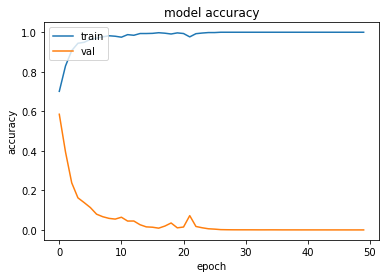

In [70]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
model1.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [73]:
!ls

dataset  dataset.zip  model.h5	sample_data


In [74]:
from google.colab import files
uploaded = files.upload()

Saving testvideo.mp4 to testvideo.mp4


In [75]:
!ls

dataset  dataset.zip  model.h5	sample_data  testvideo.mp4


In [76]:
from keras.models import load_model

In [77]:
model = load_model('model.h5')

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 118, 118, 200)     2000      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 59, 59, 200)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 57, 57, 3)         5403      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               235300    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [81]:
face_clsfr=cv2.CascadeClassifier('dataset/haarcascade_frontalface_default.xml')

In [83]:
source=cv2.VideoCapture("testvideo.mp4")

In [84]:
labels_dict={1:'MASK',0:'NO MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [1]:
from google.colab.patches import cv2_imshow
def video_process():
  while(True):

      ret,img=source.read()
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      faces=face_clsfr.detectMultiScale(gray,1.3,5)  

      for x,y,w,h in faces:
      
          face_img=gray[y:y+w,x:x+w]
          resized=cv2.resize(face_img,(120,120))
          normalized=resized/255.0
          reshaped=np.reshape(normalized,(1,120,120,1))
          result=model.predict(reshaped)

          label=np.argmax(result,axis=1)[0]
        
          cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
          cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
          cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
          
          
      cv2_imshow(img)
      key=cv2.waitKey(1)
      
      if(key==27):
          break
          
  cv2.destroyAllWindows()
  source.release()

In [2]:
#video_process()